In [133]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
import os
import pandas as pd
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import json
from collections import Counter
import time
import seaborn as sns
from communitygraph.bipartite import BipartiteCommunity as bp
import communitygraph.util as util

# Loading

In [173]:
PATH = os.path.join(os.getcwd(), 'data/100k_a.csv')

In [181]:
df = pd.read_csv(PATH, names=['user_id', 'stream_id', 'streamer_name', 'start_time', 'stop_time'])

In [175]:
df = df[:100000]

# Dev

In [150]:
twitch = bp(df, 'user_id', 'streamer_name')

Initializing...
Filtering dataframe...
Adding nodes...
Adding edges...
Completed.



In [151]:
twitch.describe_bipartite()

Total # of edges (interactions): 4003

# of unique user_id: 256
# of unique streamer_name: 211
# of unique edges: 1141

Average user_id weighted degree: 15.63671875
Average streamer_name weighted degree: 18.971563981042653
Average edge weight: 3.5083260297984222



# Testing optimization

In [ ]:
# Small scale optimization
data = util.optimize_modularity(df, 'user_id', 'streamer_name', min_item_degree=[1,5,10,20], resolution=[0.95, 1.0, 1.05])

Starting search over: 
 - min_item_degree: [1, 5, 10, 20]
 - resolution: [0.95, 1.0, 1.05]

Iteration 1/12: min_deg 1, resolution 0.95
Modularity: 0.6522244538395459
Median community size: 7
# communities: 115
# nodes: 17887
Time taken: 15.62576699256897

Iteration 2/12: min_deg 1, resolution 1.0
Modularity: 0.6527876961775119
Median community size: 7
# communities: 108
# nodes: 17887
Time taken: 14.937029361724854

Iteration 3/12: min_deg 1, resolution 1.05
Modularity: 0.6512924079997103
Median community size: 7
# communities: 114
# nodes: 17887
Time taken: 14.765727043151855

Iteration 4/12: min_deg 5, resolution 0.95
Modularity: 0.5524944413052502
Median community size: 1
# communities: 51
# nodes: 3559
Time taken: 2.8779964447021484

Iteration 5/12: min_deg 5, resolution 1.0
Modularity: 0.5530968232600503
Median community size: 1
# communities: 50
# nodes: 3559
Time taken: 2.488689422607422

Iteration 6/12: min_deg 5, resolution 1.05
Modularity: 0.5509947419498977
Median community 

In [165]:
data

{(1, 0.0): -0.0005188017828166525,
 (1, 0.5): 0.6433074689756122,
 (1, 1.0): 0.6492429096571607,
 (1, 2.0): 0.6150528355344139,
 (5, 0.0): -0.0015545088604027235,
 (5, 0.5): 0.5195149046346228,
 (5, 1.0): 0.5518950022956338,
 (5, 2.0): 0.45609038915951083,
 (10, 0.0): -0.002281515543565612,
 (10, 0.5): 0.49228266588820896,
 (10, 1.0): 0.5291932061153741,
 (10, 2.0): 0.4985941699199835,
 (20, 0.0): -0.0036787718923258733,
 (20, 0.5): 0.4838620684698795,
 (20, 1.0): 0.5092721869515203,
 (20, 2.0): 0.45303453112489567}

In [147]:
# Big dataset optimization
data = util.optimize_modularity(df, 'user_id', 'streamer_name', min_item_degree=[200, 500, 1000, 2000])

Starting search over: 
 - min_item_degree: [200, 500, 1000, 2000]
 - resolution: [1.0]

Iteration 1/4: min_deg 200, resolution 1.0, modularity 0.4625909237386571
Time taken: 130.91514372825623

Iteration 2/4: min_deg 500, resolution 1.0, modularity 0.44440385080148875
Time taken: 61.72113275527954

Iteration 3/4: min_deg 1000, resolution 1.0, modularity 0.40909016437813533
Time taken: 26.789068460464478

Iteration 4/4: min_deg 2000, resolution 1.0, modularity 0.35056445432401184
Time taken: 8.187478065490723



In [171]:
# Big dataset optimization + resolution
data = util.optimize_modularity(df, 'user_id', 'streamer_name', resolution=[0.25, 0.5, 1.0, 2.0], min_item_degree=[50, 200, 500, 1000, 2000])

Starting search over: 
 - min_item_degree: [50, 200, 500, 1000, 2000]
 - resolution: [0.25, 0.5, 1.0, 2.0]

Iteration 1/20: min_deg 50, resolution 0.25
Modularity: 0.4145818825540383
Time taken: 41.66627502441406

Iteration 2/20: min_deg 50, resolution 0.5
Modularity: 0.4577314449098118
Time taken: 57.94154906272888

Iteration 3/20: min_deg 50, resolution 1.0
Modularity: 0.4833723839770129
Time taken: 47.86175060272217

Iteration 4/20: min_deg 50, resolution 2.0
Modularity: 0.3594326926022495
Time taken: 57.330137968063354

Iteration 5/20: min_deg 200, resolution 0.25
Modularity: 0.3767234452448425
Time taken: 12.354549646377563

Iteration 6/20: min_deg 200, resolution 0.5
Modularity: 0.4333067973751559
Time taken: 12.29780101776123

Iteration 7/20: min_deg 200, resolution 1.0
Modularity: 0.46588319097192454
Time taken: 13.123764038085938

Iteration 8/20: min_deg 200, resolution 2.0
Modularity: 0.4274104262520185
Time taken: 11.162514209747314

Iteration 9/20: min_deg 500, resolution 0

In [182]:
# One additional test on big data set, low min_item_degree
data = util.optimize_modularity(df, 'user_id', 'streamer_name', resolution=[0.9, 1.0, 1.1], min_item_degree=[1, 10, 50])

Starting search over: 
 - min_item_degree: [1, 10, 50]
 - resolution: [0.9, 1.0, 1.1]

Iteration 1/9: min_deg 1, resolution 0.9
Modularity: 0.5348675660859761
Median community size: 2
# communities: 338
# nodes: 162625
Time taken: 727.461911201477

Iteration 2/9: min_deg 1, resolution 1.0
Modularity: 0.5377104357140322
Median community size: 2
# communities: 347
# nodes: 162625
Time taken: 575.6284017562866

Iteration 3/9: min_deg 1, resolution 1.1
Modularity: 0.5363003222484801
Median community size: 2
# communities: 336
# nodes: 162625
Time taken: 505.8089327812195

Iteration 4/9: min_deg 10, resolution 0.9
Modularity: 0.4985794144874094
Median community size: 1
# communities: 80
# nodes: 24546
Time taken: 185.24077129364014

Iteration 5/9: min_deg 10, resolution 1.0
Modularity: 0.4981533558856455
Median community size: 1
# communities: 78
# nodes: 24546
Time taken: 244.6836814880371

Iteration 6/9: min_deg 10, resolution 1.1
Modularity: 0.4995986520041475
Median community size: 1
# 

# Turning bipartite graph into communities

In [70]:
# Resolution ~= t
# As resolution => inf, communities => 2
# At resolution = 0, we have the highest amount of detail

In [110]:
projected = twitch.project_onto_items()

Starting weighted projection...
Finished weighted projection in 0.0151214599609375



In [111]:
partition = twitch.partition_items(resolution=100e10)

Starting partition of items with resolution 1000000000000.0...
Finished partition in 0.03187155723571777


In [112]:
hm = Counter(partition.values())

In [113]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [114]:
type(fig)

matplotlib.figure.Figure

<BarContainer object of 6 artists>

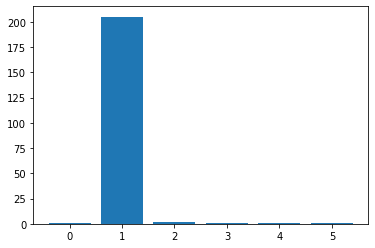

In [99]:
plt.bar(hm.keys(), hm.values())

In [102]:
# originally 0.34
community_louvain.modularity(partition, projected)

0.0004470272463207504

In [32]:
# scores with resolution 1.0:
# 0.34 with min 2000
# 0.4 with min 1000
# 0.47 with min 100

# scores with varying resolution:
# 0.46 with min 100, resolution = 0.7
